In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


In [4]:
import scipy.interpolate as inter
import curveball

In [5]:
filename = "/home/yoavram/Google Drive/ex silico/tecan/Yoav_08022015_nolag.xlsx"
max_time = 10
sheet    = None

In [6]:
maindf = curveball.io.read_tecan_xlsx(filename, ('OD','Green'), max_time=max_time, sheet=sheet)
df = maindf[maindf.Number.isin([1,2,3,4])]

grp = df.groupby(by=u'Cycle Nr.')
meangrp = grp.mean().reset_index()
stdgrp  = grp.std().reset_index()

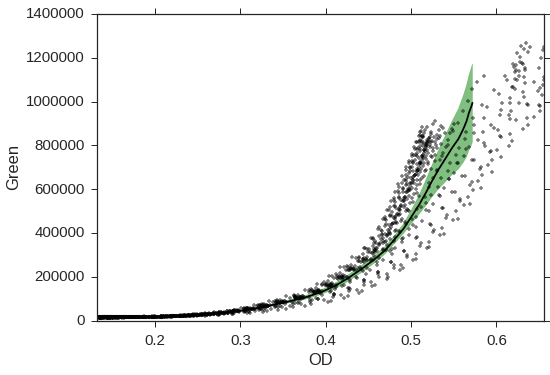

In [7]:
df.plot('OD','Green', color='k', marker='.', ls='', grid=False, legend=False, alpha=0.5)
plot(meangrp.OD, meangrp.Green, 'k-')
fill_between(meangrp.OD, y1=meangrp.Green+stdgrp.Green, y2=meangrp.Green-stdgrp.Green, color='g', alpha=0.5);
ylabel('Green');

## B-spline approximation found by R/FDA

In [8]:
knots = pd.read_csv('Breaks.csv').x.as_matrix()
#coefs = pd.read_csv('BsplineCoefs.csv').Coefs.as_matrix()
coefs = pd.read_csv('BsplineCoefs2.csv').x.as_matrix()
deg   = 6
rng   = (0.125, 0.6783)

In [9]:
OD    = linspace(knots[0], knots[-1])
Green = inter.splev(OD, (knots, coefs, deg), der=0, ext=1)[5:-5]
OD = OD[:-10]

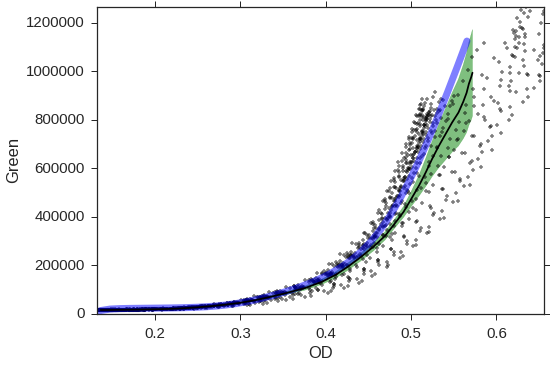

In [10]:
df.plot('OD','Green', color='k', marker='.', ls='', alpha=0.5, grid=False, legend=False)
plot(OD, Green, 'b', lw=7, alpha=0.5)
plot(meangrp.OD, meangrp.Green, 'k-')
fill_between(meangrp.OD, y1=meangrp.Green+stdgrp.Green, y2=meangrp.Green-stdgrp.Green, color='g', alpha=0.5);

ylim(0,df.Green.max())
xlabel('OD')
ylabel('Green');

## B-spline approximation found by scipy

In [11]:
knots,coefs, deg = inter.splrep(meangrp.OD, meangrp.Green, w=1/stdgrp.Green, k=3, task=0, s=0.1)

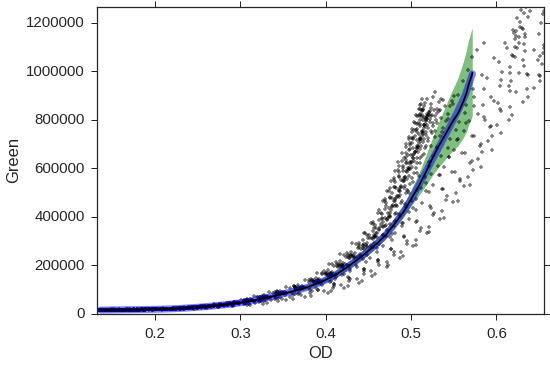

In [12]:
OD    = linspace(knots[0], knots[-1])
Green = inter.splev(OD, (knots, coefs, deg), der=0, ext=0)

df.plot('OD','Green', color='k', marker='.', ls='', alpha=0.5, grid=False, legend=False)
plot(OD, Green, 'b', lw=7, alpha=0.5)
plot(meangrp.OD, meangrp.Green, 'k-')
fill_between(meangrp.OD, y1=meangrp.Green+stdgrp.Green, y2=meangrp.Green-stdgrp.Green, color='g', alpha=0.5);

ylim(0,df.Green.max())
xlabel('OD')
ylabel('Green');

## Using `interp1d`

In [13]:
f = inter.interp1d(meangrp.Green, meangrp.OD, 3, bounds_error=False, fill_value=0) 

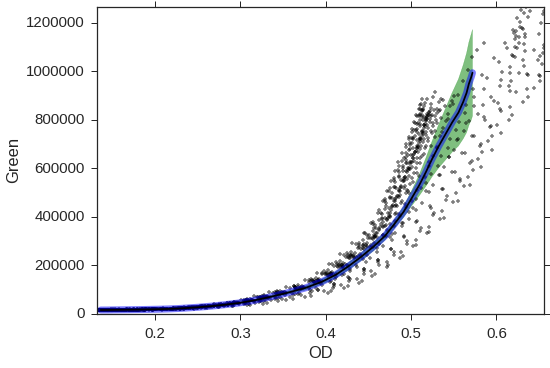

In [14]:
Green = meangrp.Green
OD    = f(Green)

df.plot('OD','Green', color='k', marker='.', ls='', alpha=0.5, grid=False, legend=False)
plot(OD, Green, 'b', lw=7, alpha=0.5)
plot(meangrp.OD, meangrp.Green, 'k-')
fill_between(meangrp.OD, y1=meangrp.Green+stdgrp.Green, y2=meangrp.Green-stdgrp.Green, color='g', alpha=0.5);

ylim(0,df.Green.max())
xlabel('OD')
ylabel('Green');

## Prediction

In [15]:
preddf = maindf[maindf.Number.isin([5,6,7,8])]

predgrp = preddf.groupby(by=u'Cycle Nr.')
predmeangrp = predgrp.mean().reset_index()
predstdgrp  = predgrp.std().reset_index()

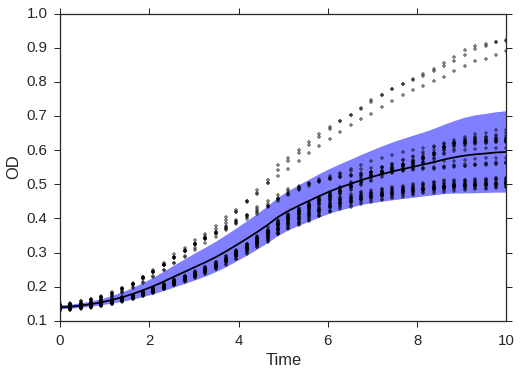

In [16]:
preddf.plot('Time_OD', 'OD', color='k', marker='.', ls='', alpha=0.5, grid=False, legend=False)
plot(predmeangrp.Time_OD, predmeangrp.OD, 'k-')
fill_between(predmeangrp.Time_OD, y1=predmeangrp.OD+predstdgrp.OD, y2=predmeangrp.OD-predstdgrp.OD, color='b', alpha=0.5);
xlabel('Time')
ylabel('OD');

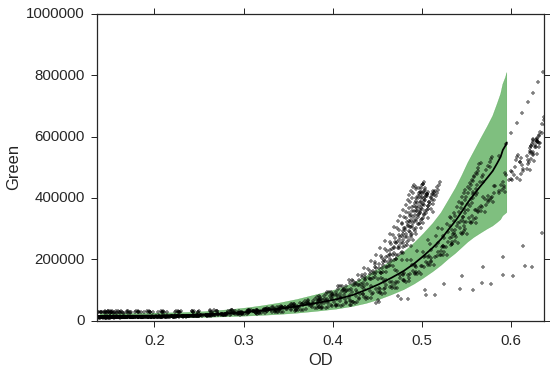

In [17]:
preddf.plot('OD','Green', color='k', marker='.', ls='', alpha=0.5, grid=False, legend=False)
plot(predmeangrp.OD, predmeangrp.Green, 'k-')
fill_between(predmeangrp.OD, y1=predmeangrp.Green+predstdgrp.Green, y2=predmeangrp.Green-predstdgrp.Green, color='g', alpha=0.5);
ylim(0,1e6)
ylabel('Green');

In [18]:
preddf['ODhat'] = map(f, preddf.Green)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


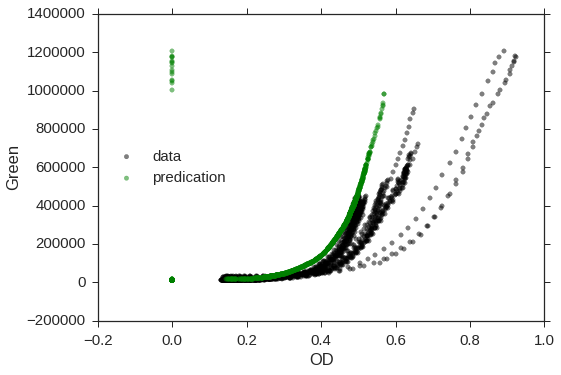

In [19]:
scatter(preddf.OD, preddf.Green, color='k', alpha=0.5)
scatter(preddf.ODhat, preddf.Green, color='g', alpha=0.5)
xlabel('OD')
ylabel('Green')
legend(['data','predication'], loc='center left')

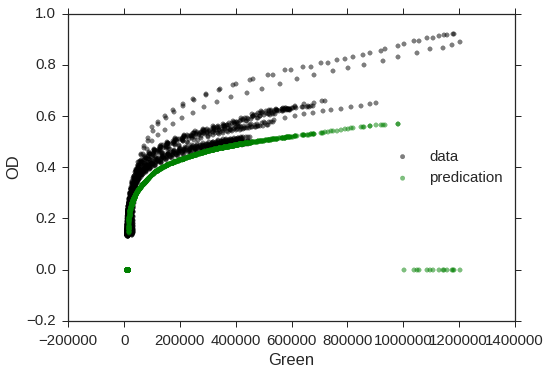

In [20]:
scatter(preddf.Green, preddf.OD, color='k', alpha=0.5)
scatter(preddf.Green, preddf.ODhat, color='g', alpha=0.5)
ylabel('OD')
xlabel('Green')
legend(['data','predication'], loc='center right')

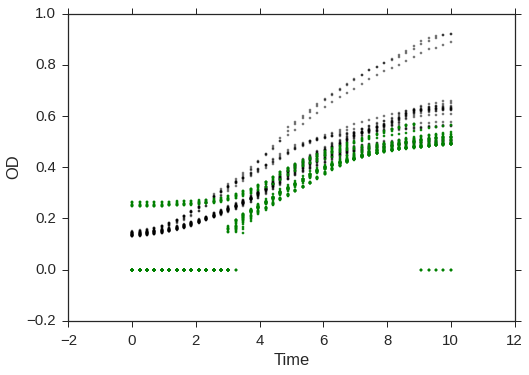

In [21]:
scatter(preddf.Time_OD, preddf.OD, marker='.', color='k', alpha=0.5)
scatter(preddf.Time_Green, preddf.ODhat, marker='.', color='g')
xlabel('Time')
ylabel('OD');

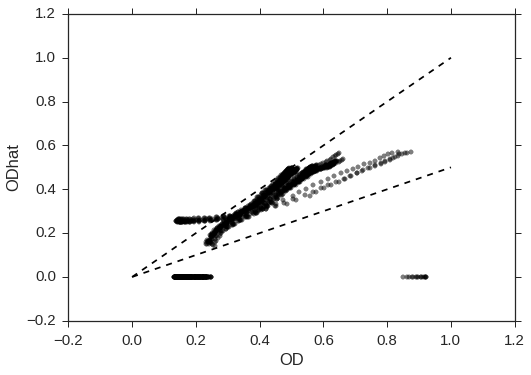

In [22]:
scatter(preddf.OD, preddf.ODhat, marker='o', color='k', alpha=0.5)
ylabel('ODhat')
xlabel('OD')
plot(linspace(0,1), linspace(0,1)/2., 'k--')
plot(linspace(0,1), linspace(0,1), 'k--');